## Gap up and gap down strategy

import necessary libraries and install yfinance

```python
!pip install yfinance


In [3]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the initial data

In [6]:
data = yf.download('AAPL', start='2010-01-01')

data.index = pd.to_datetime(data.index)

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


## Calculate adjusted open price

In [9]:
adj_factor = data['Adj Close'] / data['Close']

data['Adj Open'] = data['Open'] * adj_factor

data.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Open
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600,6.444465
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800,6.479792
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000,6.473148
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200,6.393736
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800,6.349955


## Calculate the gap up and gap down

In [16]:
data["positions"] = np.nan

# long entry condition
long_condition = data['Adj Close'] > data['Adj Close'].shift(10)

# short entry condition
short_condition = data['Adj Close'] < data['Adj Close'].shift(10)

# use 1 for long, -1 for short
data.loc[long_condition, 'positions'] = 1
data.loc[short_condition, 'positions'] = -1

data.dropna(inplace=True)

data.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Open,positions
Date,,,,,,,,
2010-02-04,7.026071,7.084643,6.841786,6.858929,5.798901,757652000,5.940212,-1.0
2010-02-05,6.879643,7.000000,6.816071,6.980714,5.901864,850306800,5.816413,-1.0
2010-02-08,6.988929,7.067143,6.928571,6.932857,5.861403,478270800,5.908809,-1.0
2010-02-09,7.015000,7.053571,6.955357,7.006786,5.923906,632886800,5.930851,-1.0
2010-02-10,6.996071,7.021429,6.937857,6.968571,5.891597,370361600,5.914846,-1.0


## calculate strategy returns

In [18]:
returns = data["Adj Close"] - data["Adj Close"] / data["Adj Close"]

data["returns"] = returns * data["positions"]

data["returns"].head()

Date
2010-02-04   -4.798901
2010-02-05   -4.901864
2010-02-08   -4.861403
2010-02-09   -4.923906
2010-02-10   -4.891597
Name: returns, dtype: float64

### Plot the returns

```

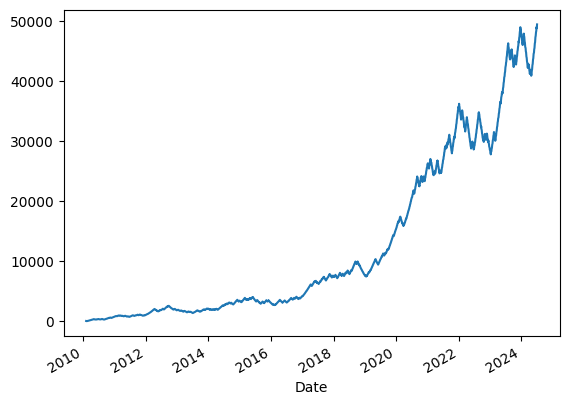

In [28]:
cumulative_returns = data["returns"].cumsum()
cumulative_returns.plot()
plt.show()